[Polynomial Regression Reference using Towards Datascience](https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2)

[Kaggle Reference](https://www.kaggle.com/code/mahyamahjoob/real-estate-valuation-using-polynomial-regression/notebook)

I am using simple linear regression to predict Valuation of house with a dependent variable conveniance store in the area,
Library as you can see below, i have used seaborn, matplotlib, sklearn, pandas, numpy

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [3]:

path = r'Real estate valuation data set.xlsx'

In [4]:

data = pd.read_excel(path)

In [5]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
data.rename(columns={"X1 transaction date": "transaction date", 
                     "X2 house age": "house age", 
                     "X3 distance to the nearest MRT station": "distance to the nearest MRT station",
                     "X4 number of convenience stores":"number of convenience stores",
                     "X5 latitude":"latitude",
                     "X6 longitude":"longitude",
                     "Y house price of unit area": "house price of unit area"
                     }, inplace=True)

In [8]:
data.columns

Index(['No', 'transaction date', 'house age',
       'distance to the nearest MRT station', 'number of convenience stores',
       'latitude', 'longitude', 'house price of unit area'],
      dtype='object')

In [9]:
data.duplicated().count()

414

In [10]:
data.nunique()

No                                     414
transaction date                        12
house age                              236
distance to the nearest MRT station    259
number of convenience stores            11
latitude                               234
longitude                              232
house price of unit area               270
dtype: int64

In [11]:
data.isnull().sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [12]:
data.shape

(414, 8)

In [13]:
data.skew()

No                                     0.000000
transaction date                      -0.150834
house age                              0.382926
distance to the nearest MRT station    1.888757
number of convenience stores           0.154607
latitude                              -0.438598
longitude                             -1.219591
house price of unit area               0.599853
dtype: float64

In [14]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [15]:
data['distance to the nearest MRT station'].corr(data['house price of unit area'])

-0.6736128553689182

In [16]:
data['number of convenience stores'].corr(data['house price of unit area'])

0.5710049111111483

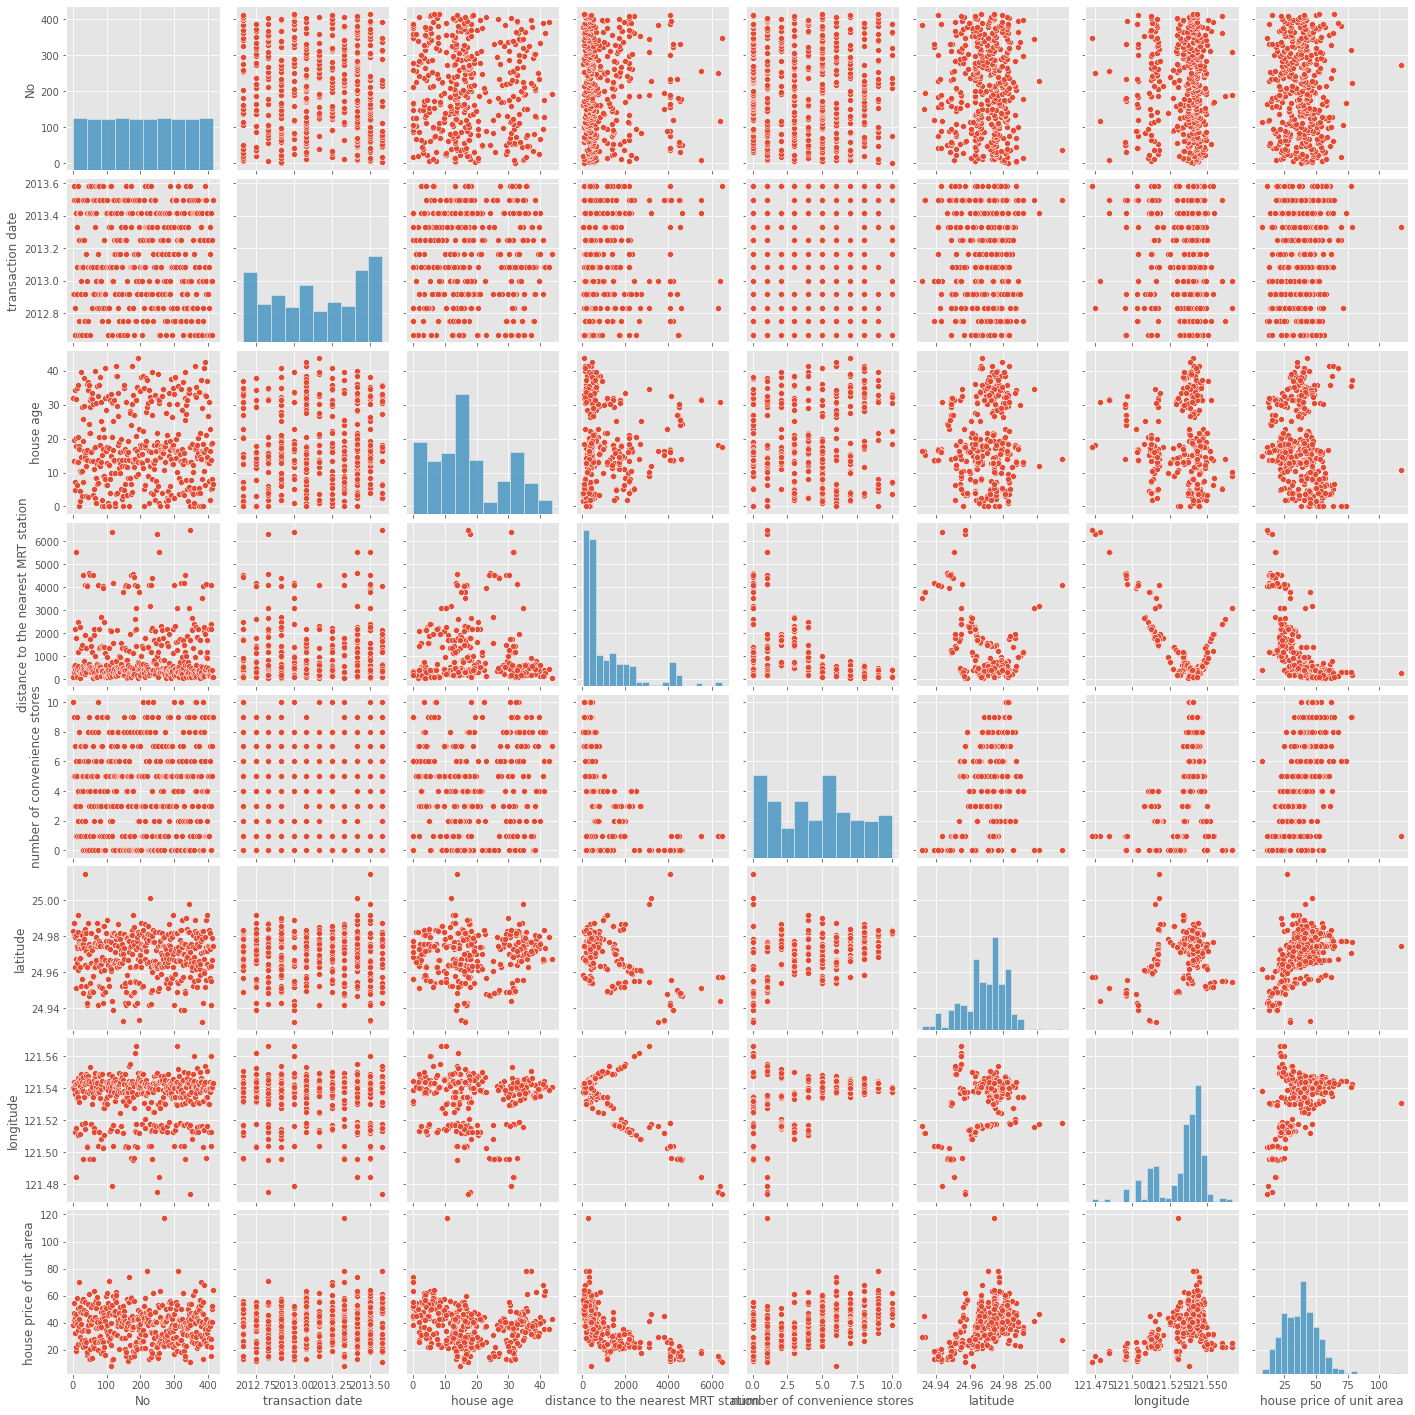

In [19]:
sns.pairplot(data)
plt.show()

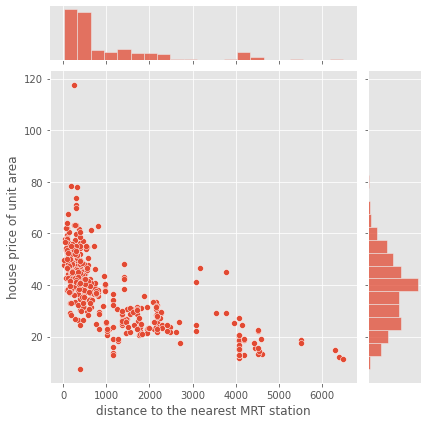

In [20]:

sns.jointplot(x='distance to the nearest MRT station', y='house price of unit area', data=data)
plt.show()

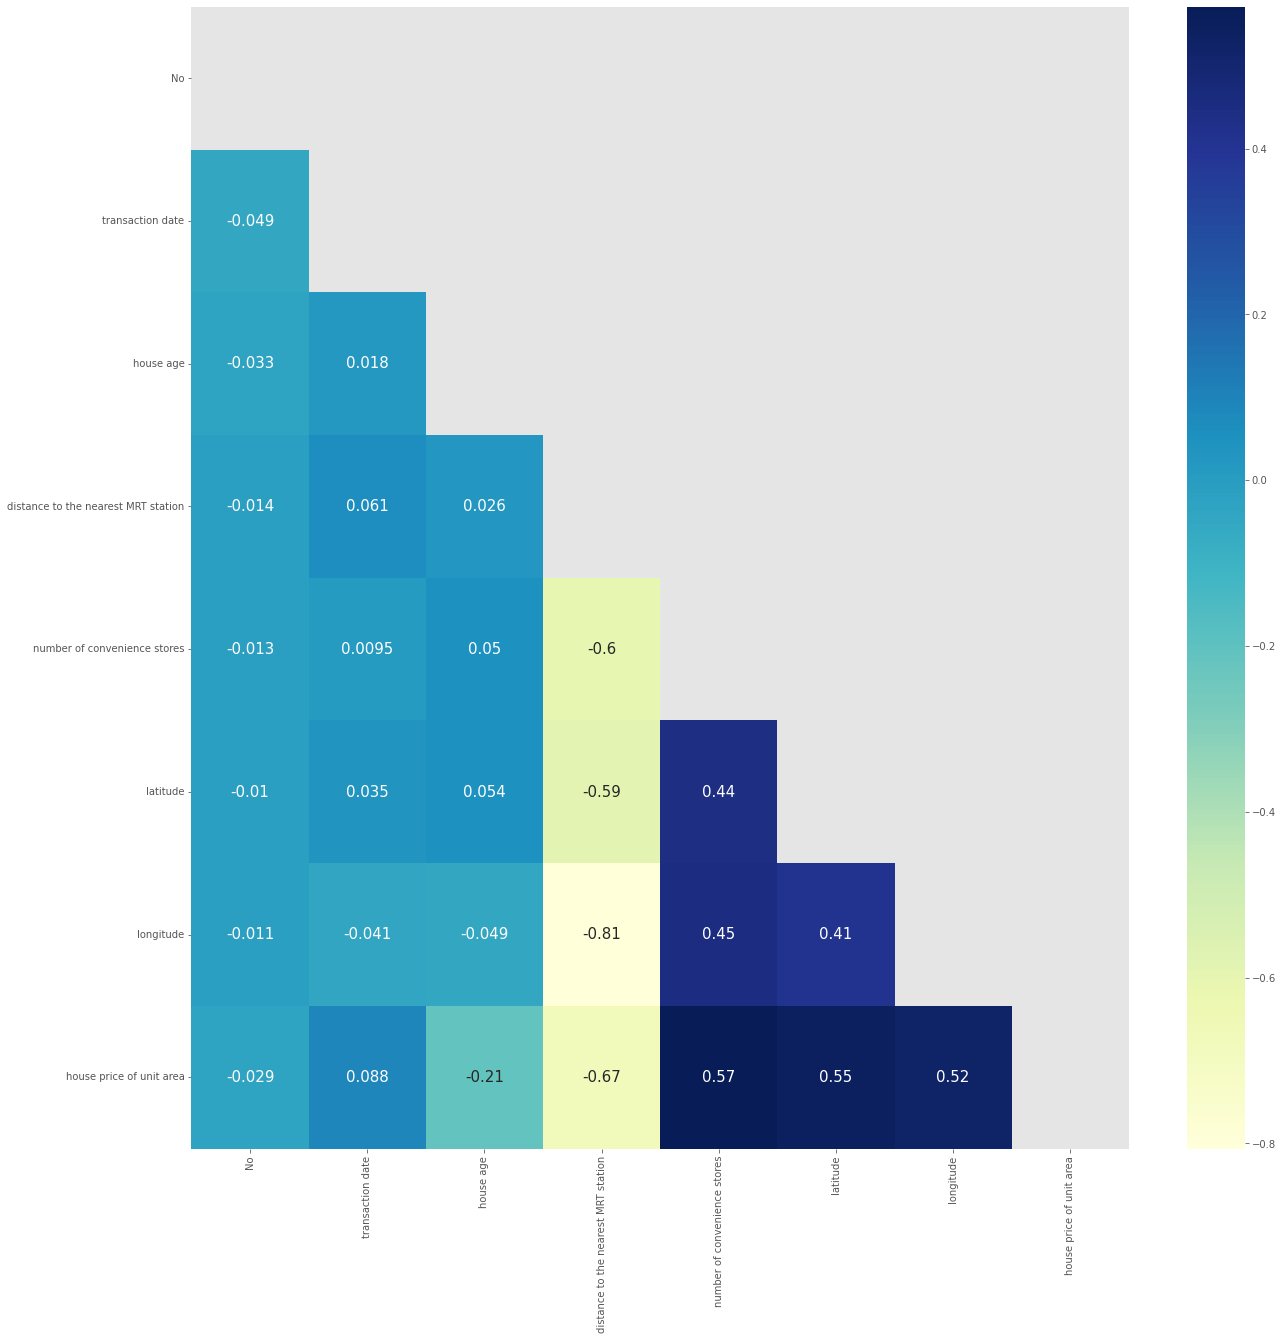

In [21]:
plt.figure(figsize=(21,21))
ax = sns.heatmap(data.corr(), mask=mask, annot = True, annot_kws={"size": 15}, cmap = 'YlGnBu')
plt.show()

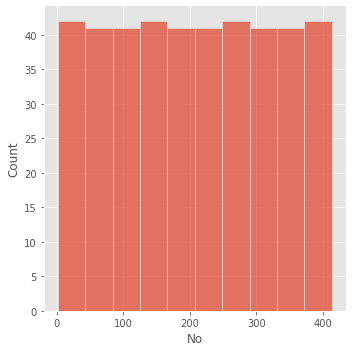

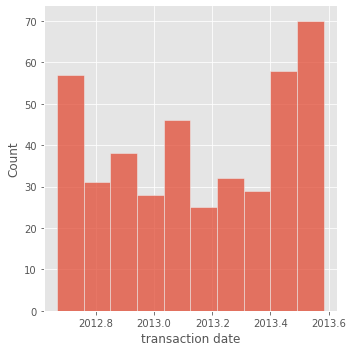

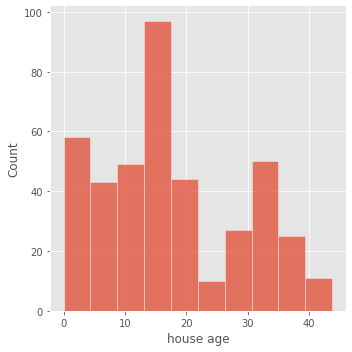

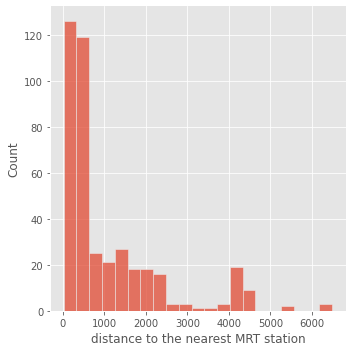

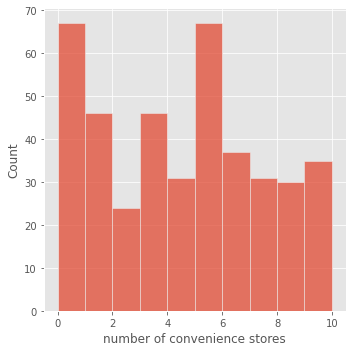

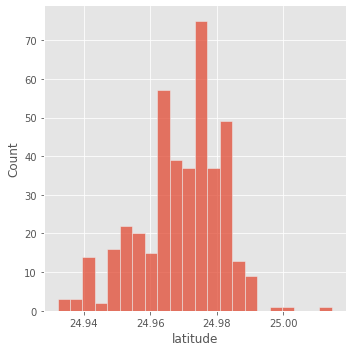

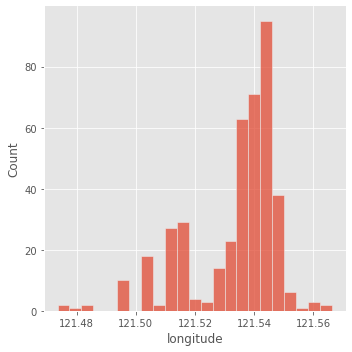

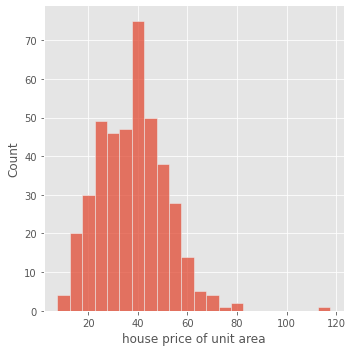

In [22]:
for i in data.columns:
    sns.displot(data[i])
    plt.show()

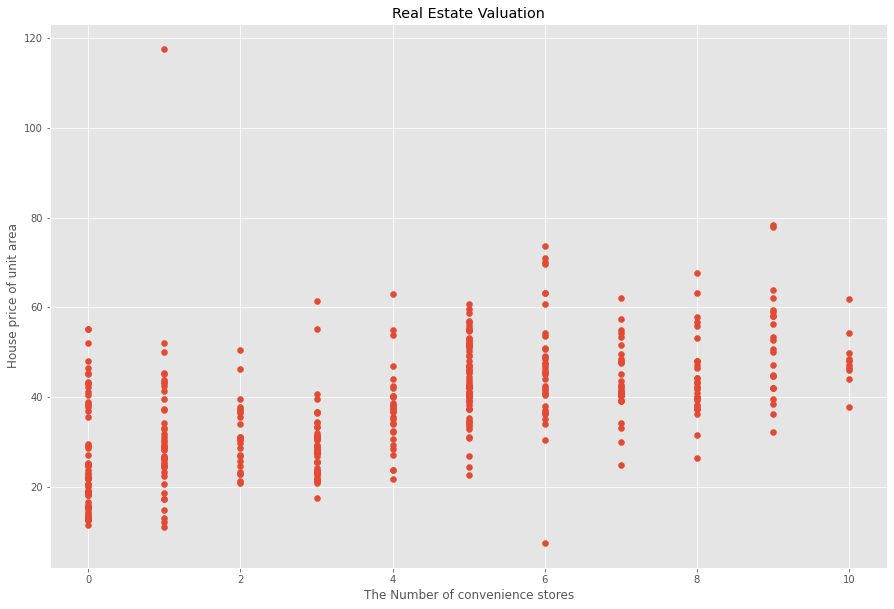

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(x=data['number of convenience stores'], y=data['house price of unit area'])
plt.xlabel('The Number of convenience stores')
plt.ylabel('House price of unit area')
plt.title('Real Estate Valuation')
plt.show()

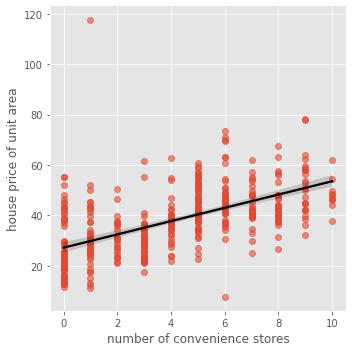

In [24]:
sns.lmplot(x='number of convenience stores', y='house price of unit area',
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'black'}, data=data)

plt.show()


In [25]:
X = np.array(data['number of convenience stores']).reshape(-1,1)
y = np.array(data['house price of unit area']).reshape(-1,1)

In [26]:
len(X), len(y)

(414, 414)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 1), (83, 1), (331,), (83,))

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regr = LinearRegression(fit_intercept=True)

In [29]:
regr.fit(X_train, y_train)

LinearRegression()

In [30]:
regr.predict([[100]])

array([277.59842119])

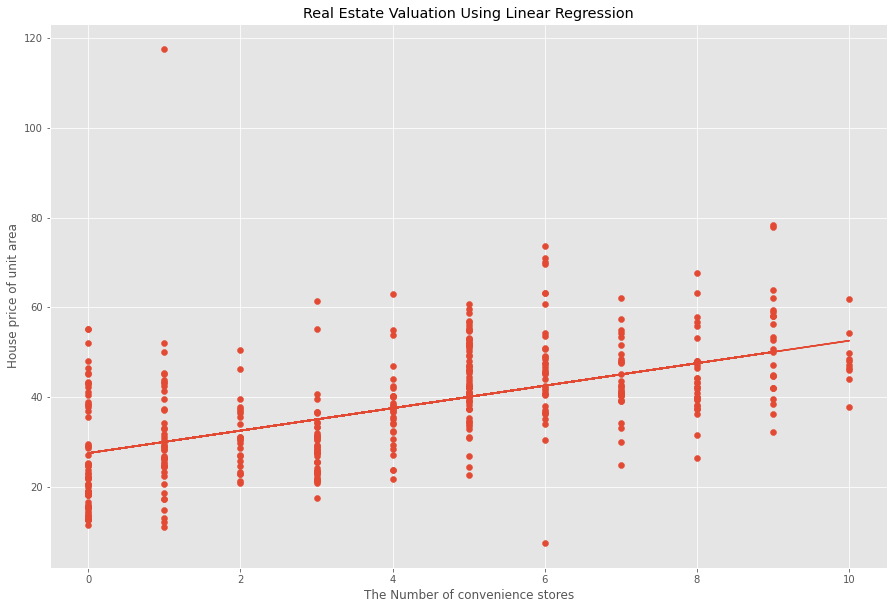

In [31]:
plt.figure(figsize = (15, 10))
plt.scatter(X, y) 
plt.plot(X_test, regr.predict(X_test))
plt.title('Real Estate Valuation Using Linear Regression')
plt.xlabel('The Number of convenience stores')
plt.ylabel('House price of unit area')
plt.show() 

In [32]:
y_pred = regr.predict(X_test)

In [33]:
print(regr.score(X_test, y_test) *100, '%')

47.451240230009375 %


In [34]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,6.907645
MSE,78.444577
RMSE,8.856894


In [35]:
test_residuals = y_test - y_pred

Text(0, 0.5, 'Y-Pred')

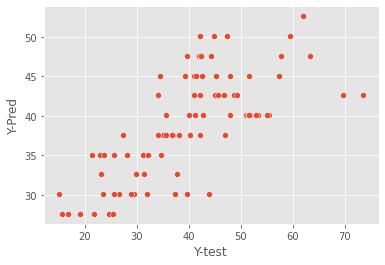

In [36]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-test')
plt.ylabel('Y-Pred')

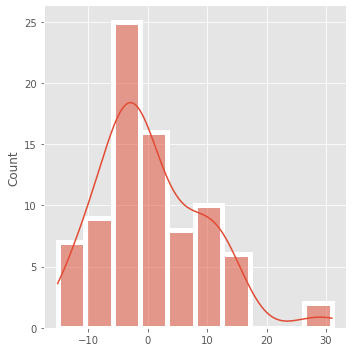

In [37]:
sns.displot(test_residuals, bins=10, kde=True, edgecolor='white', linewidth=5)

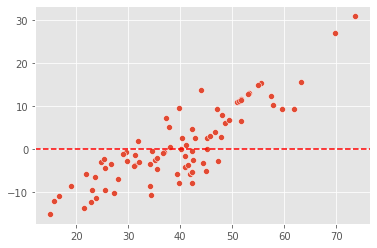

In [38]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=5
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [40]:
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

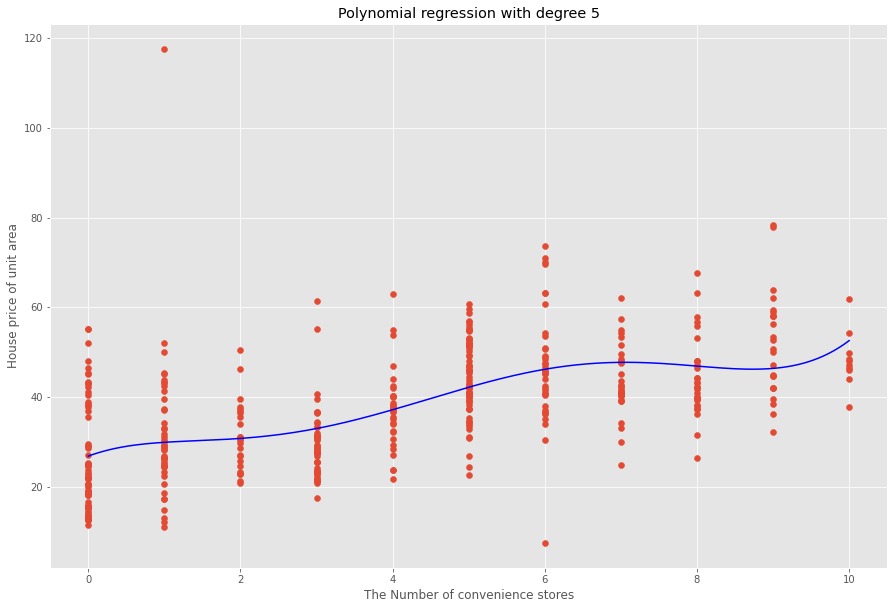

In [41]:
plt.figure(figsize = (15, 10))
plt.scatter(X, y)
plt.plot(X_seq, polyreg.predict(X_seq),color="blue")
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel('The Number of convenience stores')
plt.ylabel('House price of unit area')
plt.show() 

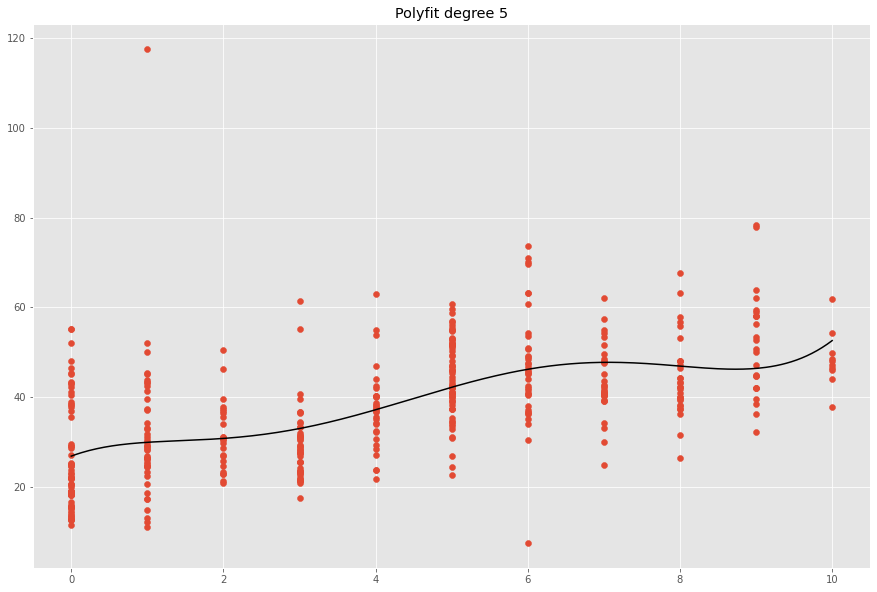

In [42]:
g = pd.DataFrame(X)
f = pd.DataFrame(y)


coefs = np.polyfit(g.values.flatten(), f.values.flatten(), 5)
plt.figure(figsize = (15, 10))
plt.plot(X_seq, np.polyval(coefs, X_seq), color="black")
plt.title("Polyfit degree "+str(degree))
plt.scatter(X,y)
plt.show()